# EDA - Team 19

Team 19
* Luis Henrique M O Imagiire
* Reinaldo Augusto D Sima
* Makoto Ikegame
* Natalia Sales Mesquita

EDA of the followin stores on ReclameAqui (27-03-2020 first 5 pages):
* tokestok-loja-online 
* tokestok 
* madeiramadeira 
* mobly 
* etna-home-store-loja-online 
* etna-home-store 
* casas-bahia-loja-online 
* casas-bahia-lojas-fisicas

Second EDA batch of ReclameAqui (04-04-2020):
- [x]  Lojas Cem
- [x]  TUTTI MÓVEIS
- [x]  Móveis Rainha
- [x]  Magazine Luiza
- [x]  Casas bahia
- [x]  Madeira Madeira
- [x]  Lojas Guido
- [x]  Fabrispuma
- [x]  Viggore Móveis
- [x]  Lider Interiores
- [x]  Lojas Lebes
- [x]  Openbox2
- [x]  Marabraz
- [x]  Sylvia Design
- [x]  Mobly
- [x]  Inovar Móveis e Colchões
- [x]  KingStar Loja
- [x]  Etna
- [x]  Tok&Stok
- [x]  Esplanada Móveis

## What questions will I be able to answer with this data?

Our MVP's target:
- Focus on answering customers' most frequent questions/problems
- Stores ranking
- Segmented analysis both online vs. bricks and mortar retailers
- Deliver a general snapshot of the vertical



## Reclame Aqui (RA) dataset sample

In [1]:
from util import agg_jsonls  # helper function
from pprint import pprint

# Unique reviews
unique_ids = set()
reviewsRA = []
for complaint in agg_jsonls("listing"):
    if "review_ID" in complaint and complaint["review_ID"] not in unique_ids:
        unique_ids.add(complaint["review_ID"])
        reviewsRA.append(complaint)

print(f"We have a total of {len(reviewsRA)} reviews!")

We have a total of 9600 reviews!


In [2]:
# Get an example of responses > 0
for review in reviewsRA:
    if "responses" in  review and len(review["responses"]["business"]) > 0:
        pprint(review)
        break

{'business_name': 'Marabraz - Loja Online',
 'city': 'Salvador',
 'datetime': '2020-02-10T17:04:00Z',
 'description': 'Fiz uma compra na empresa Marabraz online,no dia 02/01,com o '
                'número de pedido:501031622,com previsão de entrega para o dia '
                '06/02.A entrega era pra ser feita pela transportadora '
                'LeiteExpress,eles realizaram 04 tentativas, realizei o '
                'rastreamento da entrega,no dia 28/01 e 31/01 alegaram que não '
                'houve tempo hábil;no dia 03/02 não tinha ninguém na casa pra '
                'receber no final da tarde;e no dia 07/02 mais uma vez '
                'alegaram que não teve tempo hábil.Já passou o tempo de '
                'entrega mando e-mail e falo pelo chat  com a Marabraz,e eles '
                'falaram  vão entrar em contato com a empresa até o dia 19/02. '
                'Tenho que ficar a disposição da transportadora,ligo pra eles '
                'confirmaram que vão faze

### Count of complaints with response

In [4]:
reviews_with_response = [review for review in reviewsRA if "responses" in  review and len(review["responses"]["business"]) > 0]
reviews_with_no_response = [review for review in reviewsRA if "responses" in  review and len(review["responses"]["business"]) == 0]

print(f"Total of reviews with response {len(reviews_with_response)} [{round((len(reviews_with_response)/len(reviewsRA))*100, 2)}%]")
print(f"Total of reviews with NO response {len(reviews_with_no_response)} [{100- round((len(reviews_with_response)/len(reviewsRA))*100, 2)}%]")
print(f"We have a total of {len(reviewsRA)} reviews!")

Total of reviews with response 7836 [81.62%]
Total of reviews with NO response 1764 [18.379999999999995%]
We have a total of 9600 reviews!


In [5]:
from datetime import datetime
import numpy as np
import pandas as pd


def extract_days_to_resolution(review):
    if "datetime" in review and "reply" in review["responses"]["final"]:
        init_dt = datetime.strptime(review["datetime"], '%Y-%m-%dT%H:%M:%SZ')
        final_ans_dt = datetime.strptime(review["responses"]["final"]["reply"][0]["datetime"], '%Y-%m-%dT%H:%M:%SZ')
        days_diff = (final_ans_dt - init_dt).days
        if days_diff < 0:
            return 0
        return days_diff
    return np.nan


def extract_days_to_first_contact(review):
    if "datetime" in review and "business" in review["responses"] and len(review["responses"]["business"]) > 0:
        init_dt = datetime.strptime(review["datetime"], '%Y-%m-%dT%H:%M:%SZ')
        final_ans_dt = datetime.strptime(review["responses"]["business"][0]["datetime"], '%Y-%m-%dT%H:%M:%SZ')
        days_diff = (final_ans_dt - init_dt).days
        if days_diff < 0:
            return 0
        return days_diff
    return np.nan


def format_RA_to_df(review):
    cols_for_df = ['title', 'description', 'business_name', 'uf', 'city', 'review_ID', 'datetime', 'timeCaptured']
    r_cp = {col: review[col] for col in cols_for_df if col in review}
    r_cp["days_to_resolution"] = extract_days_to_resolution(review)
    r_cp["days_to_first_contact"] = extract_days_to_first_contact(review)
    r_cp["resolution_outcome"] = review["responses"]["final"]["result"] if "responses" in review and "final" in review["responses"] and "result" in review["responses"]["final"] else np.nan
    return r_cp
    

dff = pd.DataFrame([format_RA_to_df(row) for row in reviewsRA])
dff.head()


,title,description,business_name,uf,city,review_ID,datetime,timeCaptured,days_to_resolution,days_to_first_contact,resolution_outcome
0,Não entregaram o produto,"Fiz uma compra na empresa Marabraz online,no d...",Marabraz - Loja Online,BA,Salvador,100355327,2020-02-10T17:04:00Z,2020-04-03T03:36:27Z,1.0,0.0,positive
1,Descumprimento do prazo e da tratativa,"Após atraso na entrega, abri reclamação e minh...",Marabraz - Loja Online,MG,Belo Horizonte,100342419,2020-02-10T13:26:00Z,2020-04-03T03:36:31Z,NaN,49.0,NaN
2,Descaso,No dia 06/01/2020 realizei a compra de um armá...,Marabraz - Loja Online,SP,São Paulo,100343397,2020-02-10T13:44:00Z,2020-04-03T03:36:31Z,NaN,10.0,NaN
3,Quero meu dinheiro!!,"Comprei um armario na loja online marabraz, na...",Marabraz - Loja Online,SP,São Paulo,100346141,2020-02-10T14:31:00Z,2020-04-03T03:36:31Z,NaN,9.0,NaN
4,DEVOLUÇÃO.,COMPREI CHEGO COM 2 MÊS ATRASADOS. TODO QUEBR...,Marabraz - Loja Online,PR,Cafeara,100346415,2020-02-10T14:36:00Z,2020-04-03T03:36:31Z,NaN,NaN,NaN


### Word cloud from complaints' description

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import wordcloud
import pandas as pd
import nltk
from nltk.corpus import stopwords

word_cloud_text = ' '.join(dff['description'])
stop_words = set(stopwords.words("portuguese"))
without_stop_words = []
sentence = word_cloud_text
words = nltk.word_tokenize(sentence)
for word in words:
    if word not in stop_words:
        without_stop_words.append(word.lower())

word_cloud_text_SW = ' '.join(without_stop_words)

wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text_SW)


<Figure size 640x480 with 1 Axes>

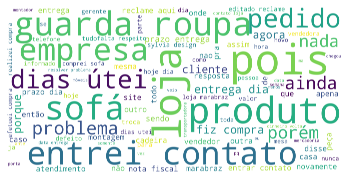

In [8]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Correlation between average response time and whether or not a response was positive/negative.**

We see that complaints that have a positive resolution are solved on average 3 times faster than the ones with a negative conclusion. Also, the time to first response is half in comparisson with the negative conclusion. We need to dig deeper to understand the properties of negative and positive outcomes.

In [60]:
dff.resolution_outcome = pd.Categorical(dff.resolution_outcome)
dff.groupby("resolution_outcome").mean()

,days_to_resolution,days_to_first_contact
resolution_outcome,,
negative,126.746207,34.064706
positive,49.650868,15.038265


**Average time to company response and evaluating experience.**

On average, companies take 15 days to give the first reply - but there are weird values for the maximum for both "days_to_resolution" and "days_to_first_contact" that do not make sense. We proceed investigating these values.

Also, when aggregating by days before contact, we have a hint that positive responses appear more frequently when the contact is made ealier on.

In [46]:
dff.describe()

,days_to_resolution,days_to_first_contact
count,3489.000000,7836.000000
mean,65.670966,16.201761
std,178.113495,55.441741
min,0.000000,0.000000
25%,2.000000,0.000000
50%,10.000000,2.000000
75%,38.000000,12.000000
max,1884.000000,833.000000


#### Investigating high values for "days until resolution"

In [9]:
dff.loc[dff.days_to_resolution  > 1500].head()

,title,description,business_name,uf,city,review_ID,datetime,timeCaptured,days_to_resolution,days_to_first_contact,resolution_outcome
459,DEFEITO DE FABRICAÇÃO,FIZ UMA COMPRA EM 21.01.2014 E CONCORDEI EM A...,Sylvia Design,SP,São Paulo,9662698,2014-08-06T13:56:00Z,2020-04-01T20:54:11Z,1884.0,1.0,positive
466,Indignação,Minha reclamação hoje é referente a indignação...,Sylvia Design,SP,São Paulo,10178100,2014-09-23T19:42:00Z,2020-04-01T20:54:11Z,1827.0,7.0,negative
3224,garantia nao atendida.,"comprei um sofá na unidade de sao miguel, que ...",Móveis Rainha,SP,Guarulhos,8673765,2014-04-29T09:50:00Z,2020-03-31T23:03:54Z,1667.0,0.0,positive


In [12]:
def get_complaint_conversation(idx, complaints):
    comps = [i for i in complaints if "review_ID" in i and i["review_ID"] == str(idx)]
    if len(comps)>0:
        return comps[0]["responses"]
    else: 
        return None
        
pprint(get_complaint_conversation(9662698, reviewsRA))
print("============================================================")
pprint(get_complaint_conversation(10178100, reviewsRA))
print("============================================================")
pprint(get_complaint_conversation(8673765, reviewsRA))


{'business': [{'content': 'Boa tarde, Isabel ! A Sylvia Design agradece seu '
                          'contato e desculpa-se pelo transtorno.Estamos '
                          'tomando todas as providencias necessárias para a '
                          'resolução do ocorrido. O departamento responsável '
                          'entrará em contato posteriormente.Atenciosamente '
                          'Relacionamento com ClienteSylvia Design (11) '
                          '3033-9505.',
               'datetime': '2014-08-07T14:05:00Z'}],
 'customer': [{'content': 'VCS NÃO SÓ NAO RESOLVERAM O PROBLEMA, COMO CONTINUO '
                          'COM O SOFÁ EM CASA SEM ENCOSTO, E NAO QUERO '
                          'AGUARDAR MAIS 60 DIAS PARA TER OUTRO SOFÁ COM SEI '
                          'LÁ QUANTOS OUTROS PROBLEMAS. QUERO MEU DINHEIRO DE '
                          'VOLTA, E AINDA ESTA SEMANA ESTAREI INDO A LOJA '
                          'REITERAR MEU DESACORDO.ESTOU 

#### Investigating high values for "days until first response"

In [10]:
dff.loc[dff.days_to_first_contact  > 600].head(2)

,title,description,business_name,uf,city,review_ID,datetime,timeCaptured,days_to_resolution,days_to_first_contact,resolution_outcome
6269,"Descaso com o consumidor, produto com defeito ...","Sou de Resende-RJ, no mês de abril fui até a l...",Inovar Móveis e Colchões,RJ,Resende,10044510,2014-09-10T21:48:00Z,2020-04-02T18:52:51Z,NaN,657.0,NaN
6276,Móvel danificado em 2 entregas!!!,Na data de 21/01/2014 efetuei a compra de uma ...,Inovar Móveis e Colchões,SP,São José dos Campos,8617940,2014-04-23T10:59:00Z,2020-04-02T19:19:25Z,NaN,659.0,NaN


In [13]:
for i in dff.loc[dff.days_to_first_contact  > 600].review_ID:
    print("================================================================")
    pprint(get_complaint_conversation(i, reviewsRA))

{'business': [{'content': 'enviado atraves do e-mail.',
               'datetime': '2016-06-29T12:47:00Z'}],
 'customer': [{'content': 'Depois de mais de 2 anos da compra do sofá '
                          '(24/04/2014), meu caso ainda não foi resolvido, não '
                          'me mandaram os pés do sofá que eles mesmos '
                          'danificaram com a entrega, não atendem os '
                          'telefones, não respondem os emails e ainda vem aqui '
                          'no reclame aqui e mente que me enviaram um email. '
                          'MENTIRA!  Eles são totalmente omissos com o '
                          'consumidor e não estão interessados em reparar e '
                          'resolver nenhum problema que eles causaram. Por '
                          'isso volto a repetir não comprem NADA, '
                          'absolutamente NADA nessa loja, pois são enganadores '
                          'e [Editado pelo Reclame Aqui].'

### Investigation of higher values: conclusion

We discovered two new dynamics from this investigation. First, high values from "days until resolution" are due to users forgetting to close the complaint ticket and only doing it years later (when they probably logged backed to the website for another complaint). Second, the unsual high values for "days to first reply" are due to company revisiting older complaints and asking the user to close the ticket (probably to increase their response rate that is shown at their profile screen). We will take this in consideration when modeling and further analysis.

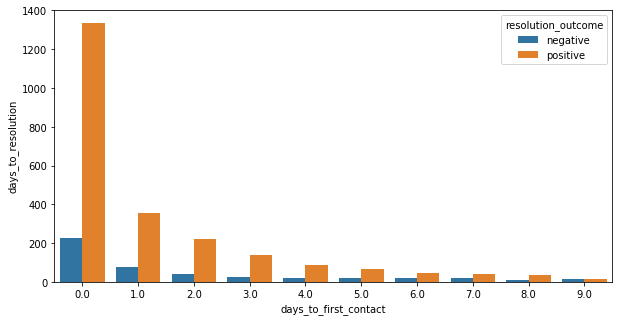

In [101]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.barplot(x="days_to_first_contact",
            y="days_to_resolution",
            hue="resolution_outcome",
            data=dff.groupby(["days_to_first_contact", "resolution_outcome"]).count().head(20).reset_index(),ax=ax)

In [15]:
answered_perc = round(dff.days_to_first_contact.count()/dff.shape[0] * 100, 2) 
print(f"Total of answered complaints : {answered_perc}%")

Total of answered complaints : 81.62%


**Percentage of answered complaints by store**

In [19]:
aa = dff.groupby("business_name").count()
aa = round(aa.days_to_first_contact/aa.review_ID * 100, 2) 
pprint(aa.sort_values())

business_name
Magazine Luiza - Loja Online       0.00
Casas Bahia - Loja Online          1.74
Tok&Stok - Loja Online             6.38
Casas Bahia - Lojas Físicas        8.24
MadeiraMadeira                    11.73
Casas Bahia - Marketplace         12.04
Etna Home Store - Loja Online     13.04
Etna Home Store                   22.22
Magazine Luiza - Loja Física      26.14
Tok&Stok - Loja Física            34.29
Mobly                             41.38
Lojas Cem                         55.38
Lojas Guido                       61.11
TUTTI MÓVEIS                      65.70
Marabraz - Loja Online            88.00
                                  93.64
Marabraz - Lojas Físicas          94.93
Openbox2                          97.30
Inovar Móveis e Colchões          98.32
Sylvia Design                     99.91
Móveis Rainha                    100.00
Fabrispuma                       100.00
Viggore Móveis                   100.00
dtype: float64


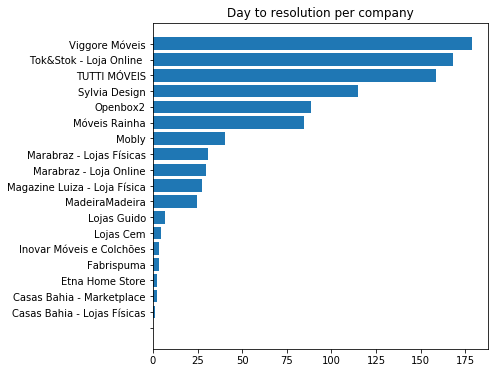

In [87]:
view = dff.groupby('business_name').agg({'days_to_resolution': 'mean'}).reset_index().dropna()

height = view["days_to_resolution"].sort_values()
bars = view["business_name"]
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize=(6,6))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Day to resolution per company')
plt.show()

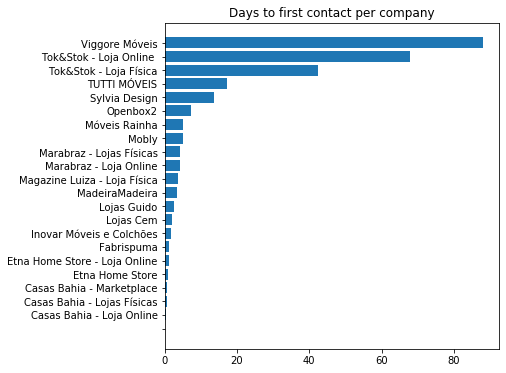

In [88]:
view = dff.groupby('business_name').agg({'days_to_first_contact': 'mean'}).reset_index().dropna()

height = view["days_to_first_contact"].sort_values()
bars = view["business_name"]
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize=(6,6))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Days to first contact per company')
plt.show()

**Investigation of ' ' stores**

We see that it must been some sort of bug while scraping data from RA. We have descriptions pointing towards different stores, so it is not a single store problem.

In [20]:
dff.loc[dff["business_name"]=='']

,title,description,business_name,uf,city,review_ID,datetime,timeCaptured,days_to_resolution,days_to_first_contact,resolution_outcome
73,Atraso na entrega,"Comprei os moveis pedido 501056490, compra apr...",,SP,São Bernardo do Campo,100263403,2020-02-07T14:02:00Z,2020-04-03T03:40:23Z,NaN,0.0,NaN
74,Absurdo,Fiz uma compra no dia 21/11/2019 de um guarda ...,,SP,São Paulo,100264023,2020-02-07T14:16:00Z,2020-04-03T03:40:23Z,12.0,0.0,negative
89,"COMPREI, PAGUEI e NÃO RECEBI O PRUDUTO.",COMPREI UM GUARDA ROUPA NO DIA 29/01/2020 (PED...,,SP,São Paulo,100254139,2020-02-07T10:59:00Z,2020-04-03T03:40:52Z,NaN,13.0,NaN
132,Recebi um armário com 2 peças faltando.,Recebi um armário com 2peças faltando e entrar...,,RJ,Nova Iguaçu,100203653,2020-02-06T08:52:00Z,2020-04-03T03:44:37Z,NaN,0.0,NaN
488,Empresa horrivel,Comprei um produtos pela Marabraz que era pra ...,,SP,Ilhabela,99784485,2020-01-26T09:46:00Z,2020-04-03T12:57:51Z,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9484,Mau atendimento montagem,Boa noite!Fizemos uma grande compra na loja da...,,SP,São Paulo,97388795,2019-11-25T19:16:00Z,2020-04-01T12:11:47Z,NaN,0.0,NaN
9519,ENTREGA FORA DE PRAZO,Fui na loja da R Catumbi na ultima segunda fei...,,SP,São Paulo,95086435,2019-09-11T16:56:00Z,2020-04-01T12:14:31Z,0.0,0.0,positive
9572,Falta de Respeito com consumidor,No dia 3/5/2017 fui na loja com meu marido com...,,SP,Sorocaba,26698415,2017-06-06T21:41:00Z,2020-04-03T18:16:41Z,1.0,1.0,positive
9583,Indignada,No dia 18/04/2017 fui até a loja 128 marabraz ...,,SP,São Paulo,26502497,2017-05-29T12:15:00Z,2020-04-03T18:18:13Z,0.0,0.0,positive


**Tag analysis**

In [21]:
unique_tags = set()
for review in reviewsRA:
    if "tags" in review:
        for tag in review["tags"]:
            unique_tags.add(tag)

print(f"We have {len(unique_tags)} unique tags!")
pprint(unique_tags)

We have 264 unique tags!
{'Acessórios de Vestuário',
 'Acessórios para Bebê',
 'Acessórios para Carros',
 'Agendamento',
 'Alto falantes',
 'Amassado',
 'Aparadores',
 'Aparelho de jantar',
 'Aparelhos de musculação',
 'Aparelhos de som',
 'Aplicativos',
 'Ar condicionado',
 'Armários de cozinha',
 'Aromatizantes e Difusores',
 'Artigos Religiosos',
 'Artigos para bebê',
 'Aspiradores e vassouras',
 'Assistência técnica',
 'Assistência técnica e Garantia',
 'Assistência técnica indisponível',
 'Atendimento na Loja',
 'Atraso na entrega',
 'Atraso na entrega do produto',
 'Atraso no reembolso por cancelamento',
 'Balanças',
 'Bancos e banquetas',
 'Berço desmontável',
 'Bikes',
 'Bolsas',
 'Bolsas e Malas',
 'Bonecos e Bonecas',
 'Braço quebrado',
 'Braço solto',
 'Brinquedos e jogos',
 'Brinquedos eletrônicos',
 'Brinquedos para bebês',
 'Cabeceira',
 'Cadeira bamba',
 'Cadeiras',
 'Cafeteiras e Chaleiras',
 'Caixas de som e fone de ouvido',
 'Cama, Mesa e Banho',
 'Camas e camas-box',

### Aggregating tags into macro categories

We found that we can aggregate tags into macro categories, removing redundant tags. We look forward to developing more structure in the future.

In [22]:
tag_map = {
    "others": {'Lento',
               'Não encontrei meu problema',
               'Outro Tipo de produto/Serviço',
               'Outro problema',
               'Outros'},
    'products': {'Acessórios de Vestuário',
                 'Acessórios para Bebê',
                 'Acessórios para Carros',
                 'Alto falantes',
                 'Aparadores',
                 'Aparelho de jantar',
                 'Aparelhos de musculação',
                 'Aparelhos de som',
                 'Ar condicionado',
                 'Armários de cozinha',
                 'Aromatizantes e Difusores',
                 'Artigos Religiosos',
                 'Artigos para bebê',
                 'Aspiradores e vassouras',
                 'Balanças',
                 'Bancos e banquetas',
                 'Berço desmontável',
                 'Bikes',
                 'Bolsas',
                 'Bolsas e Malas',
                 'Bonecos e Bonecas',
                 'Brinquedos e jogos',
                 'Brinquedos eletrônicos',
                 'Brinquedos para bebês',
                 'Cabeceira',
                 'Cadeiras',
                 'Cafeteiras e Chaleiras',
                 'Caixas de som e fone de ouvido',
                 'Cama, Mesa e Banho',
                 'Camas e camas-box',
                 'Celular',
                 'Celulares e Smartphones',
                 'Chapinhas (Pranchas)',
                 'Churrasqueira',
                 'Chuveiro elétrico',
                 'Chuveiros e Aquecedores',
                 'Climatizador de ar',
                 'Clubes de Compras e Vantagens',
                 'Coifa e depurador',
                 'Colchões',
                 'Colchões e acessórios',
                 'Componentes, peças e acessórios',
                 'Computadores all in one',
                 'Console (Videogame)',
                 'Controle remoto',
                 'Controles e Joysticks',
                 'Conversor digital',
                 'Cooktop',
                 'Cortina',
                 'Cristaleiras',
                 'Câmera',
                 'Decoração',
                 'Eletrodomésticos',
                 'Eletroeletrônicos',
                 'Eletroportáteis',
                 'Equipamentos de Beleza e Estética',
                 'Equipamentos de academia',
                 'Equipamentos de rede-Wireless',
                 'Escovas - Modeladores - Babyliss',
                 'Farmácias',
                 'Ferro de passar',
                 'Fios e cabos',
                 'Fogão-Forno',
                 'Fone de ouvido',
                 'Frigobar',
                 'Fritadeira elétrica',
                 'Fôrmas e assadeiras',
                 'Games e Jogos',
                 'Gel',
                 'Geladeira-Refrigerador',
                 'Guarda-Roupas',
                 'Higiene e Limpeza Pessoal',
                 'Iluminação e Elétrica',
                 'Impressoras',
                 'Informática',
                 'Jogo de cama',
                 'Jogos',
                 'Lava louças',
                 'Lavadora de roupas e Tanquinho',
                 'Leitores de Ebooks',
                 'Lençol',
                 'Liquidificadores',
                 'Livros',
                 'Lixeiras',
                 'Louças',
                 'Louças e Metais',
                 'MP3 Player',
                 'Mesa de jantar',
                 'Mesas e Cadeiras',
                 'Micro-ondas',
                 'Milhas',
                 'Mixers e Processadores de alimentos',
                 'Mochilas',
                 'Monitores',
                 'Máquinas de cortar o cabelo',
                 'Móveis',
                 'Móveis Infantis',
                 'Móveis Modulados',
                 'Móveis Planejados',
                 'Móveis em Geral',
                 'Móveis para Escritório',
                 'Móveis para Jardim e Piscina',
                 'Notebooks',
                 'Organizadores de cozinha',
                 'Painéis para TV',
                 'Panela',
                 'Panela elétrica',
                 'Perfumarias',
                 'Perfume',
                 'Pisos e Revestimentos Vinílicos',
                 'Plafon',
                 'Players de DVD-Blue Ray',
                 'Poltronas',
                 'Pontos',
                 'Porta Livros',
                 'Portas',
                 'Portas e Janelas',
                 'Potes',
                 'Prateleiras e cantoneiras',
                 'Rack e bancadas',
                 'Relógios',
                 'Sabonete líquido',
                 'Secador de cabelo',
                 'Secadora de roupa e centrífuga',
                 'Smartphone',
                 'Sofás e Estofados',
                 'TV',
                 'Tablets',
                 'Talheres',
                 'Tapetes',
                 'Tapetes e Carpetes',
                 'Teclados',
                 'Telefones fixos (aparelhos)',
                 'Toalhas',
                 'Travesseiros',
                 'Utilidades domésticas',
                 'Ventiladores e Circuladores de ar',
                 'Vidros',
                 'Vidros e Espelhos'},
    "product_issues": {
        'Amassado',
        'Braço quebrado',
        'Braço solto',
        'Cadeira bamba',
        'Atraso na entrega',
        'Atraso na entrega do produto',
        'Colchão irregular',
        'Danos ao imóvel',
        'Deformado',
        'Desconfortável',
        'Descosturado',
        'Desgaste prematuro',
        'Desligando sozinha',
        'Desligando sozinho',
        'Dificuldade para abrir-fechar a porta',
        'Encosto com problema',
        'Encosto quebrado',
        'Entrega',
        'Esquentando',
        'Estofamento manchado',
        'Estofamento rasgado',
        'Estrado quebrado',
        'Falta de peças',
        'Falta de peças para reparo',
        'Fazendo muito barulho',
        'Gavetas não abrem-fecham',
        'Incompatibilidade',
        'Inferior ao vendido',
        'Instalação-Reparo não concluídos',
        'Liga e desliga sozinho',
        'Mesa bamba',
        'Mesa quebrada',
        'Mesa riscada',
        'Molas quebradas',
        'Montagem',
        'Má qualidade do produto',
        'Não acende',
        'Não aguenta peso',
        'Não atende',
        'Não carrega',
        'Não conecta à intenet',
        'Não gela',
        'Não liga',
        'Não recebi',
        'Perdendo fio',
        'Pernas quebradas',
        'Peças erradas',
        'Peças faltando',
        'Peças quebradas',
        'Problema nas bocas do fogão',
        'Problemas com a tela',
        'Problemas de coluna causados pelo colchão',
        'Problemas de sinal',
        'Produto com defeito',
        'Produto com peças faltando',
        'Produto danificado',
        'Produto errado',
        'Produto indisponível',
        'Produto não parece original',
        'Produto não recebido',
        'Produto não reparado',
        'Produto quebrou com pouco tempo de uso',
        'Produto rasgado',
        'Produto usado',
        'Produtos divergentes',
        'Projeto divergente',
        'Pé quebrado',
        'Qualidade do Produto',
        'Qualidade do produto',
        'Tampa trincada-quebrada',
        'Tecido de baixa qualidade',
        'Tela manchada',
        'Tela quebrada',
        'Vazando água',
        'Vidro quebrado',
    },
    "business_issues": {
        'Aplicativos',
        'Atendimento na Loja',
        'Atraso no reembolso por cancelamento',
        'Cartão de crédito',
        'Cartões de Crédito',
        'Canais de Atendimento',
        'Comportamento do profissional',
        'Demora no atendimento',
        'Demora no reparo',
        'Desacordo Comercial',
        'Divergência de valores',
        'Equipe de Atendimento',
        'Estado de conservação da loja',
        'Estorno do valor pago',
        'Fila',
        'Forma de pagamento indisponível',
        'Funcionários despreparados',
        'Maquiagem de preço',
        'Marketplace',
        'Mau Atendimento',
        'Mau atendimento no SAC',
        'Não consigo agendar',
        'Não consigo fazer operação por telefone',
        'Problema com garantia estendida',
        'Problemas com as ligações',
        'Problemas com lojas de móveis',
        'Problemas com o Atendimento',
        'Problemas com o Site',
        'Problemas na Loja',
        'Problemas na finalização da compra',
        'Problemas para utilizar aplicativos',
        'Troca-Devolução de produto',
        'Promoção',
        'Propaganda Enganosa',
        'Propaganda enganosa',
        'Pré venda e Projeto',
        'Qualidade do serviço prestado',
        'Serviço não incluso na garantia',
        'Site fora do ar-Lento',
        'Sites e portais',
        'Valor de frete',
        'Assistência técnica e Garantia',
        'Assistência técnica', 'Assistência técnica indisponível',
    }
}

In [28]:
# Adding Macro categories
for review in reviewsRA:
    if "tags" in review:
        macro_tags = []
        for tag in review["tags"]:
            for macro, vals in tag_map.items():
                if tag in vals:
                    macro_tags.append(macro)
        review["macro_tags"] = macro_tags

In [29]:
def format_tags_to_df(tag_field, reviews):
    unique_tags = set()
    unique_businesses = set()
    
    # Getting unique tags and company names
    for review in reviews:
        unique_businesses.add(review['business_name'])
        if tag_field in review:
            for tag in review[tag_field]:
                unique_tags.add(tag)
    
    tags_per_businesses = pd.DataFrame(0, columns = unique_businesses, index = unique_tags)
    for review in reviews:
        if tag_field in review:
            for tag in review[tag_field]:
                tags_per_businesses[review['business_name']][tag] += 1 
    return tags_per_businesses

macro_tag_df = format_tags_to_df("macro_tags", reviewsRA)
macro_tag_df

,,Magazine Luiza - Loja Online,Marabraz - Lojas Físicas,Marabraz - Loja Online,Magazine Luiza - Loja Física,Openbox2,Casas Bahia - Marketplace,Casas Bahia - Lojas Físicas,MadeiraMadeira,Lojas Cem,...,Lojas Guido,Etna Home Store - Loja Online,Inovar Móveis e Colchões,Móveis Rainha,Sylvia Design,Casas Bahia - Loja Online,Tok&Stok - Loja Online,Fabrispuma,TUTTI MÓVEIS,Etna Home Store
business_issues,5,27,799,393,24,7,23,12,38,26,...,5,5,305,88,342,36,45,26,10,1
others,9,108,269,1264,93,3,15,183,108,130,...,2,26,74,7,31,101,45,13,5,39
products,15,192,2565,4305,190,60,124,91,189,184,...,23,26,986,167,1168,197,27,124,43,32
product_issues,3,53,1258,1721,62,20,29,38,77,46,...,10,12,443,126,573,54,12,37,19,24


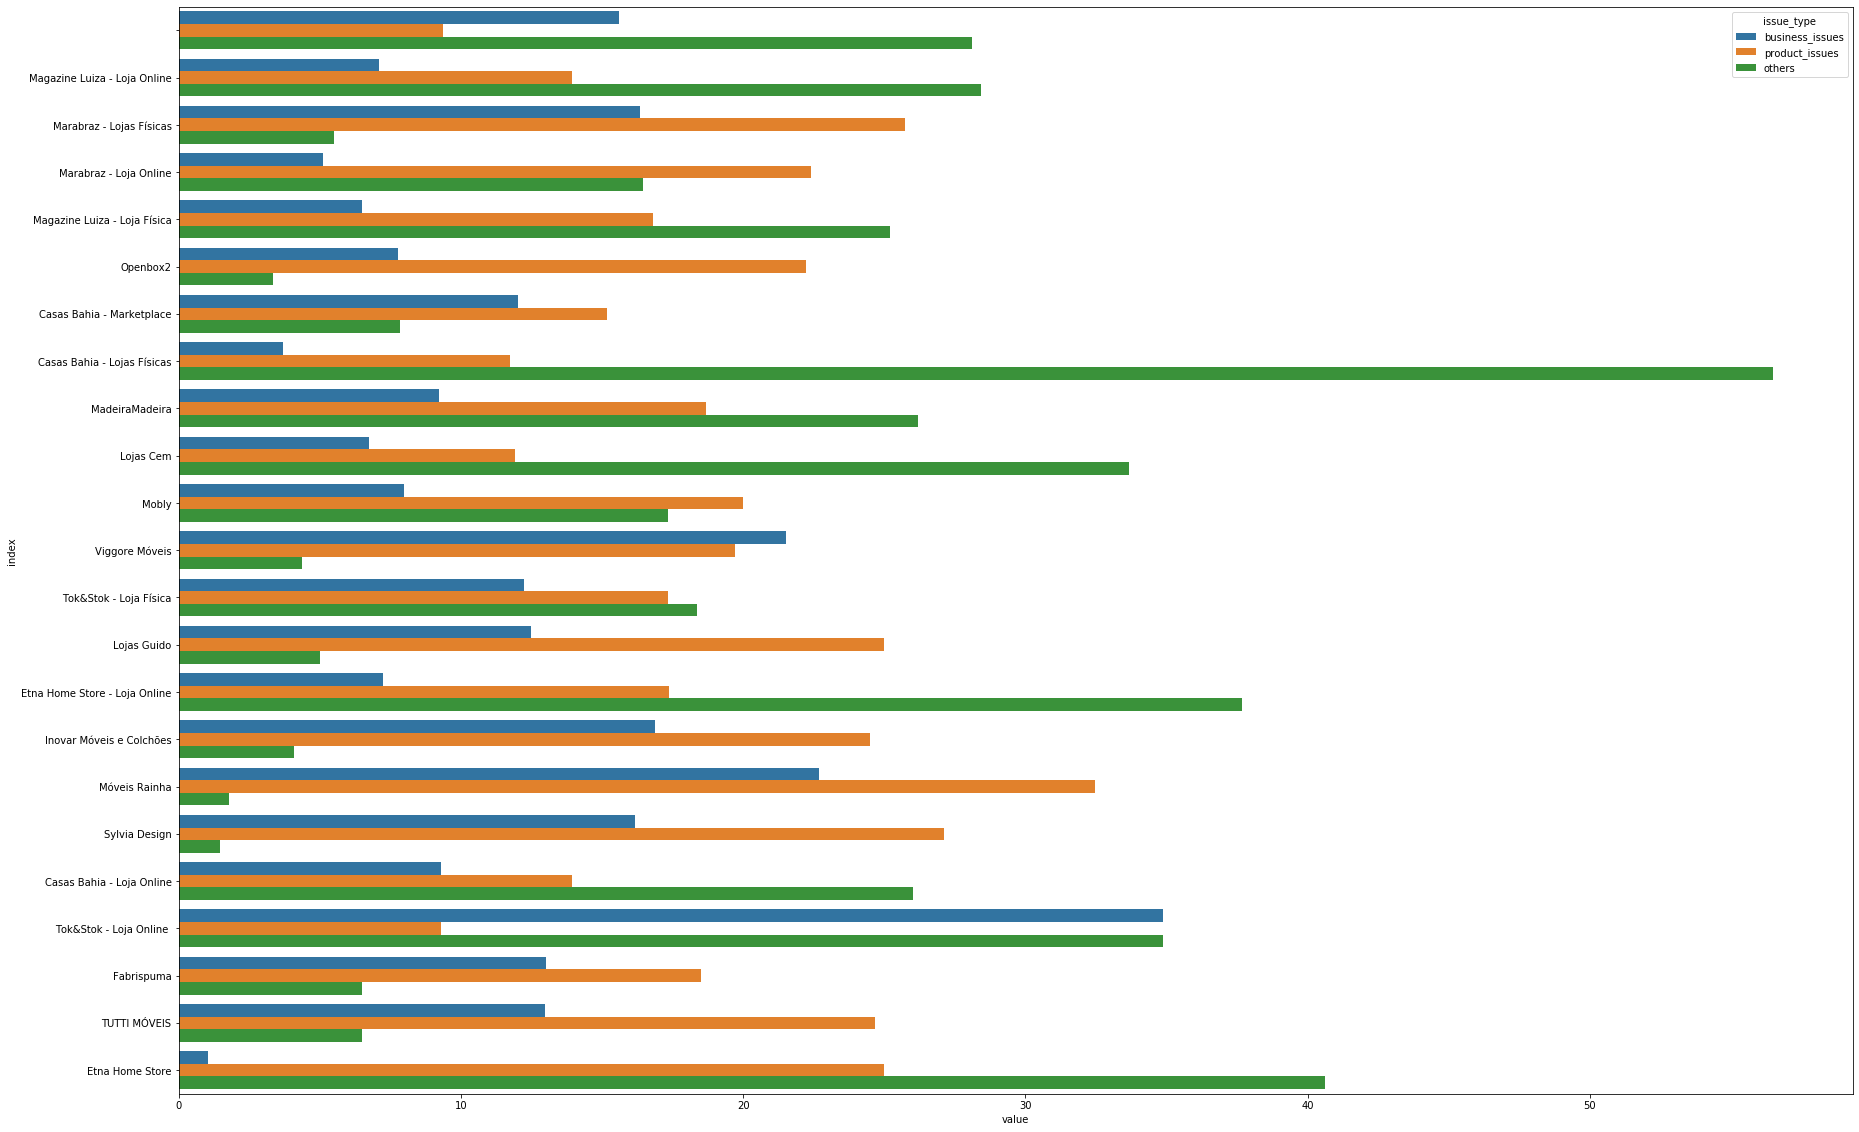

In [107]:
import seaborn as sns
perc_macro_tags_df = round(macro_tag_df.transpose().divide(macro_tag_df.transpose().sum(axis=1), axis=0)*100, 2)

fig,ax = plt.subplots(figsize=(30, 20))

sns.barplot(x="value",y="index", 
                 hue="issue_type", 
                 data=perc_macro_tags_df[["business_issues", "product_issues", "others"]].reset_index().melt(id_vars=["index"], var_name="issue_type"), ax=ax)

In [73]:
unique_tags = set()
unique_businesses = set()

# Getting unique tags and company names
for review in reviewsRA:
    unique_businesses.add(review['business_name'])
    if "tags" in review:
        for tag in review["tags"]:
            unique_tags.add(tag)

tags_per_businesses = pd.DataFrame(0, columns = unique_businesses, index = unique_tags)

In [74]:
for review in reviewsRA:
    if "tags" in review:
        for tag in review['tags']:
            tags_per_businesses[review['business_name']][tag] += 1 
    
tags_per_businesses

,,Magazine Luiza - Loja Online,Marabraz - Lojas Físicas,Marabraz - Loja Online,Magazine Luiza - Loja Física,Openbox2,Casas Bahia - Marketplace,Casas Bahia - Lojas Físicas,MadeiraMadeira,Lojas Cem,...,Lojas Guido,Etna Home Store - Loja Online,Inovar Móveis e Colchões,Móveis Rainha,Sylvia Design,Casas Bahia - Loja Online,Tok&Stok - Loja Online,Fabrispuma,TUTTI MÓVEIS,Etna Home Store
Falta de peças para reparo,0,0,22,0,1,0,0,0,0,2,...,0,0,1,1,1,0,0,0,0,0
Encosto com problema,0,0,5,0,0,0,0,0,1,0,...,0,0,3,1,5,0,0,0,0,0
Louças,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Produto quebrou com pouco tempo de uso,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Clubes de Compras e Vantagens,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Milhas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Outro problema,4,41,121,512,38,1,4,68,44,46,...,1,10,30,3,13,37,18,5,2,14
Portas e Janelas,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Colchões e acessórios,0,0,19,45,1,0,1,2,0,0,...,0,0,15,0,0,0,0,19,0,0


### Filtering for customer support tags

In [75]:
problem_categories=['Assistência técnica e Garantia',
 'Atraso na entrega',
 'Canais de Atendimento',
 'Demora no reparo',
 'Desgaste prematuro',
 'Divergência de valores',
 'Entrega',
 'Equipe de Atendimento',
 'Estorno do valor pago',
 'Falta de peças',
 'Maquiagem de preço',
 'Mau Atendimento',
 'Mau atendimento no SAC',
 'Montagem',
 'Má qualidade do produto',
 'Não atende',
 'Não consigo agendar',
 'Não encontrei meu problema',
 'Outro problema',
 'Pernas quebradas',
 'Peças erradas',
 'Peças quebradas',
 'Problema com garantia estendida',
 'Problemas com o Atendimento',
 'Problemas com o Site',
 'Problemas na finalização da compra',
 'Produto com defeito',
 'Produto com peças faltando',
 'Produto errado',
 'Produto indisponível',
 'Produto não recebido',
 'Propaganda Enganosa',
 'Pé quebrado',
 'Qualidade do Produto',
 'Site fora do ar-Lento',
 'Troca-Devolução de produto',
 'Valor de frete']

tags_per_businesses.loc[problem_categories]

,,Magazine Luiza - Loja Online,Marabraz - Lojas Físicas,Marabraz - Loja Online,Magazine Luiza - Loja Física,Openbox2,Casas Bahia - Marketplace,Casas Bahia - Lojas Físicas,MadeiraMadeira,Lojas Cem,...,Lojas Guido,Etna Home Store - Loja Online,Inovar Móveis e Colchões,Móveis Rainha,Sylvia Design,Casas Bahia - Loja Online,Tok&Stok - Loja Online,Fabrispuma,TUTTI MÓVEIS,Etna Home Store
Assistência técnica e Garantia,0,0,78,45,1,2,0,0,6,1,...,1,2,25,17,47,0,0,4,2,0
Atraso na entrega,2,22,417,1001,21,7,14,11,27,6,...,3,3,152,18,165,31,4,7,3,6
Canais de Atendimento,0,0,14,0,0,0,0,0,0,0,...,0,0,3,1,19,0,8,0,0,0
Demora no reparo,0,0,62,0,1,0,0,1,0,2,...,2,0,34,17,35,0,0,2,1,1
Desgaste prematuro,0,0,5,0,0,0,0,0,0,0,...,0,0,1,5,4,0,0,0,0,1
Divergência de valores,0,0,21,4,1,2,1,0,2,2,...,0,2,1,3,8,1,1,1,0,0
Entrega,0,0,114,173,0,0,0,0,0,0,...,1,2,25,16,29,0,0,0,0,4
Equipe de Atendimento,1,0,81,0,0,0,0,0,0,0,...,0,0,37,3,29,0,3,0,0,0
Estorno do valor pago,0,7,60,228,5,0,12,0,9,2,...,0,0,23,1,14,14,5,6,0,0
Falta de peças,0,0,5,5,0,0,0,0,1,0,...,0,0,1,3,0,0,0,0,0,1


## NLP Analysis

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import nltk 
from nltk.corpus import stopwords
#nltk.download('punkt')
#nltk.download('stopwords')
import numpy  as np
import string
#from nltk.stem import PorterStemmer 
import unicodedata

In [20]:
word_cloud_text = ' '.join(dff['description'])

stop_words = set(stopwords.words("portuguese"))
without_stop_words = []
sentence = word_cloud_text
words = nltk.word_tokenize(sentence)
for word in words:
    if word not in stop_words:
        without_stop_words.append(word)

In [21]:
stop_words = set(stopwords.words("portuguese"))
without_stop_words = []
stopword = []
sentence = word_cloud_text
words = nltk.word_tokenize(sentence)
for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)

In [22]:
def clean_reviews(review):
    without_stop_words = []
    words = nltk.word_tokenize(review.lower())
    for word in words:
        if not word in stop_words:
            without_stop_words.append(word)

    return ' '.join(without_stop_words)

In [23]:
def strip_punctuation(text):
    """
    >>> strip_punctuation(u'something')
    u'something'

    >>> strip_punctuation(u'something.,:else really')
    u'somethingelse really'
    """
    punctutation_cats = set(['Pc', 'Pd', 'Ps', 'Pe', 'Pi', 'Pf', 'Po'])
    return ''.join(x for x in text
                   if unicodedata.category(x) not in punctutation_cats)

In [24]:
dff['cleaned_review'] = dff.description.apply(lambda x: strip_punctuation(clean_reviews(x)))
    
dff.head()

,title,description,business_name,uf,city,review_ID,datetime,timeCaptured,days_to_resolution,days_to_first_contact,resolution_outcome,cleaned_review
0,Estorno de entrega,Eu comprei uma mesa no dia 29.01.2019 a vista ...,Inovar Móveis e Colchões,SP,São José dos Campos,90143053,2019-03-28T19:32:00Z,2020-04-02T14:37:21Z,NaN,0.0,NaN,comprei mesa dia 29012019 vista prazo entrega ...
1,Nao entregaram no prazo e descaso não retornam...,Comprei em 26.01 moveis para quarto e mesa sa...,Inovar Móveis e Colchões,SP,São Paulo,90109323,2019-03-27T20:09:00Z,2020-04-02T14:37:24Z,35.0,0.0,positive,comprei 2601 moveis quarto mesa sala jantar se...
2,Insatisfação com o produto,No dia 05/01/2018 fiz uma compra a vista na lo...,Inovar Móveis e Colchões,SP,Jacareí,43153321,2019-02-25T10:59:00Z,2020-04-02T14:37:46Z,NaN,0.0,NaN,dia 05012018 fiz compra vista loja inovar jaca...
3,Produto entregue errado e quebrado,Boa tarde! Adquiri uma cama box marron com tec...,Inovar Móveis e Colchões,SP,São José dos Campos,43172911,2019-02-25T18:24:00Z,2020-04-02T14:37:46Z,NaN,0.0,NaN,boa tarde adquiri cama box marron tecido sued...
4,"Produto entregue com defeito, aguardando a tro...",Em novembro comprei um sofá na loja inovar de ...,Inovar Móveis e Colchões,SP,São Sebastião,43196029,2019-02-26T12:37:00Z,2020-04-02T14:37:46Z,NaN,0.0,NaN,novembro comprei sofá loja inovar sao sebastiã...


In [25]:
from collections import Counter

AllReviews = dff['cleaned_review']

all_reviews_text = ' '.join(AllReviews)
tokenized_words = nltk.word_tokenize(all_reviews_text)
word_freq = Counter(tokenized_words)

word_freq.most_common(20)

[('dia', 14417),
 ('loja', 13062),
 ('entrega', 9157),
 ('dias', 8173),
 ('compra', 7572),
 ('produto', 6937),
 ('contato', 6152),
 ('sofá', 5871),
 ('pois', 5201),
 ('prazo', 4967),
 ('comprei', 4958),
 ('pedido', 4336),
 ('nada', 3839),
 ('empresa', 3423),
 ('marabraz', 3297),
 ('pra', 3149),
 ('problema', 3057),
 ('gerente', 2938),
 ('hoje', 2796),
 ('agora', 2785)]

In [26]:
selected_reviews = [each for each in AllReviews if 'entrega' in each]

for review in selected_reviews[:30]:
    index = review.find('entrega')
    print(review[index-10:index+20].replace("\n", ""))

sta prazo entrega dia 1503 ent
 pergunte entrega informaram e
duto casa entregadores rasgara
s mostrei entregador afirmou p
es  agora entregaram justifica
arcar dia entrega cabeccabecei
mprometeu entregarem todos jun
 realizar entrega moveis 10 di
r produto entregaram  deram ne
té  prazo entrega 0711  portan
 atibaia  entrega deu último d
dia 0508  entrega combinada 30
ro braço  entregar msm detecto
m n feita entrega alegando def
harem bom entrega  entrei cont
visão pra entrega  quero fazer
  agendei entrega  ser prédio 
 disse ia entregar mesa semana
ts porque entregaram porta cor
r disse q entregaria 7 dias an
s  vieram entregar móveis entr
strativas entrega  creio fuja 
edor iria entregar antes natal
ter prazo entrega escolhi agor
o agendou entrega 17h30  chega
ealizaram entrega  dia 2201 ag
problemas entrega  devidamente
rico duas entregas ploblemas  
ra  antes entregar pra gerar m
p agendar entrega pois produto


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=1,k=1):
    vec = CountVectorizer(ngram_range=(k,k),stop_words = 'portuguese').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [28]:
from nltk.util import ngrams

def top_k_ngrams(word_tokens,n,k):
    
    n_gram_list = list(ngrams(word_tokens, n))

    n_gram_strings = [' '.join(each) for each in n_gram_list]
    
    n_gram_counter = Counter(n_gram_strings)
    most_common_k = n_gram_counter.most_common(k)
    pprint(most_common_k)

In [29]:
port_stopwords = stopwords.words('portuguese')

#n-grams
word_tokens = nltk.word_tokenize(all_reviews_text)
top_k_ngrams(word_tokens, 3, 10)

[('editado reclame aqui', 680),
 ('valor r $', 304),
 ('5 dias úteis', 298),
 ('comprei guarda roupa', 279),
 ('entrei contato sac', 250),
 ('entrei contato loja', 246),
 ('fiz compra dia', 214),
 ('10 dias úteis', 205),
 ('4 dias úteis', 203),
 ('loja sylvia design', 201)]


In [30]:
top_k_ngrams(word_tokens, 2, 10)

[('entrei contato', 1871),
 ('dias úteis', 1749),
 ('fiz compra', 1413),
 ('guarda roupa', 1317),
 ('prazo entrega', 1280),
 ('30 dias', 1125),
 ('r $', 1107),
 ('reclame aqui', 981),
 ('entrega dia', 801),
 ('entrar contato', 784)]


In [31]:
def get_top_n_words(corpus, n=1,k=1):
    vec = CountVectorizer(ngram_range=(k,k),stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [32]:
common_words = get_top_n_words(AllReviews, 20, 2)

for word, freq in common_words:
    print(word, freq)

df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

entrei contato 1872
dias úteis 1749
fiz compra 1414
guarda roupa 1319
prazo entrega 1280
30 dias 1125
reclame aqui 981
entrega dia 803
entrar contato 784
nota fiscal 720
sylvia design 703
editado reclame 680
10 dias 655
realizei compra 651
falta respeito 643
loja marabraz 632
comprei sofá 627
hoje dia 616
efetuei compra 604
dias uteis 568


In [33]:
#Inovar vs. Sylvia Design

inovar_reviews = [each for each in dff[dff.business_name == 'Inovar Móveis e Colchões'].cleaned_review]

sylvia_reviews = [each for each in dff[dff.business_name == 'Sylvia Design'].cleaned_review]

In [34]:
inovar_reviews_text = ' '.join(inovar_reviews)
tokenized_words = nltk.word_tokenize(inovar_reviews_text)
inovar_word_freq = Counter(tokenized_words)

inovar_word_freq.most_common(20)

[('loja', 2050),
 ('sofá', 1431),
 ('dia', 1394),
 ('entrega', 957),
 ('gerente', 878),
 ('dias', 762),
 ('inovar', 672),
 ('compra', 661),
 ('contato', 637),
 ('produto', 562),
 ('pois', 551),
 ('comprei', 470),
 ('nada', 449),
 ('prazo', 417),
 ('problema', 412),
 ('disse', 411),
 ('vendedor', 393),
 ('troca', 365),
 ('mesa', 333),
 ('empresa', 323)]

In [35]:
sylvia_reviews_text = ' '.join(sylvia_reviews)
tokenized_words = nltk.word_tokenize(sylvia_reviews_text)
sylvia_word_freq = Counter(tokenized_words)

sylvia_word_freq.most_common(20)

[('sofá', 2382),
 ('loja', 2356),
 ('dia', 1871),
 ('entrega', 1256),
 ('dias', 1157),
 ('pois', 1007),
 ('compra', 959),
 ('sylvia', 893),
 ('mesa', 889),
 ('contato', 879),
 ('produto', 862),
 ('design', 759),
 ('prazo', 712),
 ('comprei', 702),
 ('vendedor', 701),
 ('empresa', 662),
 ('sac', 621),
 ('cadeiras', 565),
 ('problema', 565),
 ('disse', 552)]

In [36]:
inovar_word_tokens = nltk.word_tokenize(inovar_reviews_text)
top_k_ngrams(inovar_word_tokens, 4, 10)

[('comprei sofá loja inovar', 15),
 ('center vale josé campos', 13),
 ('inovar shopping center vale', 11),
 ('prazo entrega 30 dias', 11),
 ('loja inovar móveis colchões', 11),
 ('shopping center vale josé', 10),
 ('entrega 30 dias úteis', 9),
 ('compra sofá loja inovar', 9),
 ('loja inovar shopping center', 8),
 ('entrei contato gerente loja', 8)]


In [37]:
sylvia_word_tokens = nltk.word_tokenize(sylvia_reviews_text)
top_k_ngrams(sylvia_word_tokens, 4, 10)

[('sofá loja sylvia design', 29),
 ('entrega 45 60 dias', 18),
 ('loja sylvia design av', 17),
 ('sylvia design raposo tavares', 16),
 ('prazo entrega 45 60', 15),
 ('prazo 45 60 dias', 14),
 ('sylvia design comprei sofá', 14),
 ('comprei sofá sylvia design', 14),
 ('av zaki narchi 42', 14),
 ('loja sylvia design raposo', 14)]


## Google Business Store Dataset

In [19]:
reviewsGB = agg_jsonls("gbusiness")
print(f"We have a total of {len(reviewsGB)} reviews!")
pprint(reviewsGB[0])

We have a total of 40 reviews!
{'caption': '',
 'id_review': 'ChZDSUhNMG9nS0VJQ0FnSUNjemJPSkR3EAEaFkNra0VkOHhNczE2WmVhRXRtWWZoanc',
 'n_photo_user': 0,
 'n_review_user': 0,
 'rating': 4.0,
 'relative_date': 'um dia atrás',
 'retrieval_date': '2020-03-21T15:38:25Z',
 'url_user': 'https://www.google.com/maps/contrib/112092464143644397071?hl=pt-BR',
 'username': 'Maria Gorete Veras Martins de Carvalho'}


In [22]:
caption_reviews = [i for i in reviewsGB if len(i["caption"]) > 0]

print(f"Reviews with caption: {round((len(caption_reviews) / len(reviewsGB))*100,2)}%")

Reviews with caption: 25.0%


In [24]:
pprint(caption_reviews[0:3])

[{'caption': '(Tradução do Google) Está bem  (Original) Ok',
  'id_review': 'ChdDSUhNMG9nS0VJQ0FnSUNjMWVLaS1RRRABGhZkOTdseko4VG4yVzZyYUVPWkQ0TTln',
  'n_photo_user': 0,
  'n_review_user': 0,
  'rating': 5.0,
  'relative_date': '3 dias atrás',
  'retrieval_date': '2020-03-21T15:38:25Z',
  'url_user': 'https://www.google.com/maps/contrib/108919364759095568849?hl=pt-BR',
  'username': 'roberto boni'},
 {'caption': 'Sempre sou bem atendida.',
  'id_review': 'ChdDSUhNMG9nS0VJQ0FnSUNjNVpuMW5RRRABGhZzcjhXRmlIYi1zaXAzLURfSDJuVHVn',
  'n_photo_user': 0,
  'n_review_user': 1,
  'rating': 5.0,
  'relative_date': '3 dias atrás',
  'retrieval_date': '2020-03-21T15:38:25Z',
  'url_user': 'https://www.google.com/maps/contrib/102183203056207578960?hl=pt-BR',
  'username': 'Rauana Cristina Salas Calvo'},
 {'caption': 'gostp somente dos eletrodomésticos',
  'id_review': 'ChdDSUhNMG9nS0VJQ0FnSUNjcVlDem1RRRABGhZscGN4amx3NnJsSy1jdS1DbWxMbG9n',
  'n_photo_user': 0,
  'n_review_user': 20,
  'rating': 4.0,
  

In [28]:
# Average rates
print(f"Average grade {np.average([i['rating'] for i in reviewsGB])}")


Average grade 4.25


### General impressions - Google Business
Here we have less data to work with and most of them does not include a caption/description, so we might need a larger number of points to make a deep analysis. 
However, since this is not a complaint focused platform, we expect to have more positive responses from the users (and that can be seen by the 4.25 average rating of our sample data) - allowing us to draw a better overall picture of the store.


# First EDA conclusions

### EDA Statistics

We conclude that the majority (~86%) of the companies do not respond, but we also noticed that when spitted by company, there are differences between them (there are companies that do not respond at all). Regarding the most common problems, we see that the main problems are regarding customer support and delivery. From our word cloud and the n-grams analysis, we found that the most common words are those related to the problems ("atendimento" -> support, "entrega" -> delivery ...), reinforcing our previous findings.

### EDA data next steps

We found that we will need more data points in our final dataset, given that we want to do a deep analysis on every store. We want to have better estimates on response time and get data on negative conclusion (we only got positive conclusions in this sample). Thus, we will be scraping data every day from today onward. The data features are good, specially for ReclameAQUI data, we will have a broad feature space to build from the complaints description that will help to guide our ratings. For the Google Business data, we will adapt the scraper to store the geolocation of location. Additionally, as we are drawing from multiple sources (namely ReclameAQUI, Google Business and Facebook Reviews) that classify businesses differently, we will also have to look into how to aggregate data at different levels in order to achieve fruitful results.

# Second EDA Conclusions (04/04/2020)

In this new analysis, we have almost 10k of data points and develop a more general understanding of our data. Found specific dynamics underlying weird values and had ideas on how to better aggregate our data sources.

### Nonsense max values for "days until resolution" and "days to first reply"
With the new batch of data, we found very weird max values for "days until resolution" (1800+ days) and "days to first reply" (500+ days). Investigating further, we uncovered two dynamics from this investigation. 

First, high values from "days until resolution" are due to users forgetting to close the complaint ticket and only doing it years later (when they probably logged backed to the website for another complaint). Second, the unsual high values for "days to first reply" are due to company revisiting older complaints and asking the user to close the ticket (probably to increase their response rate that is shown at their profile screen). We will take this in consideration when modeling and doing further analysis.

### Better category/tag organization
We found that we can aggregate complaints' tags into macro categories to create better overall understanding of the problem. We also found that there are many problems tagged as "others", we plan to dig deeper and see if we can develop nlp models to "re-tag" them based on similar complaints. Also, we want to break these tags into more specific category groups that might be of users' interests in the future.

### New Response rate insight
Previously, we saw that the majority of the complaints were not answered, but now we have the inverse conclusion. What we found is that newly complaints (as the ones that we scrape from the firsts pages) take a while to receive a response, so our previous batch was highly biased.

Also, we found out that there are only a few companies that have very low response rates. This is strange because nowadays the companies are looking forward to having good relations with their clients. And it is also curious that the companies that are in this situation are the larger ones.

One way we try to explain that is that these stores have a lot of comments per day and the companies just haven't had the time to answer the complaints yet. Thus, we will intensify the scrapping effort on these companies pages and get as many historical data as possible.

### NLP analysis
In general, an NLP analysis of the dataset shows that most complaints made against furniture retailers revolve around words related to the order (order, shop, buy, store) or to the actual delivery of the product (day, delivery, days, arrival). A k-gram investigation of the issue confirms our findings and word sets such as "5 working days" and "delivery date" are on top of the list.
We then proceeded to a side-by-side comparison between 2 similar sized businesses: Sylvia Design and Inovar. A word frequency analysis shows us that both experience most customer inquires regarding couches, however, their approaches to delivering their mecharndise differ somewhat. Sylvia Design delivers in 45 to 60 days while Inovar's delivery is 15 days shorter.